# Visualisation and Preprocessing

## 1.0 Load Libraries

In [1]:
print ('Loading libraries ...')

import os

import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import config
import utils

Loading libraries ...


## 2.0 Load Dataset

In [2]:
dataset = 'facies_data.csv'
data = pd.read_csv(dataset)
data.drop_duplicates().reset_index(drop=True)
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


## 3.0 Visualisation

Logs are usually represented in some form of line graph that operators can interprete. Let's transform our log readings into such graphs. We can also assign colors to the facies classes and attach a plot of the facies classes in a well from our dataset to the graph of its log readings. First, lets get the function that creates the plots we have just described and set it up inn our utils file. Then we can call the function to make the plots in this notebook.

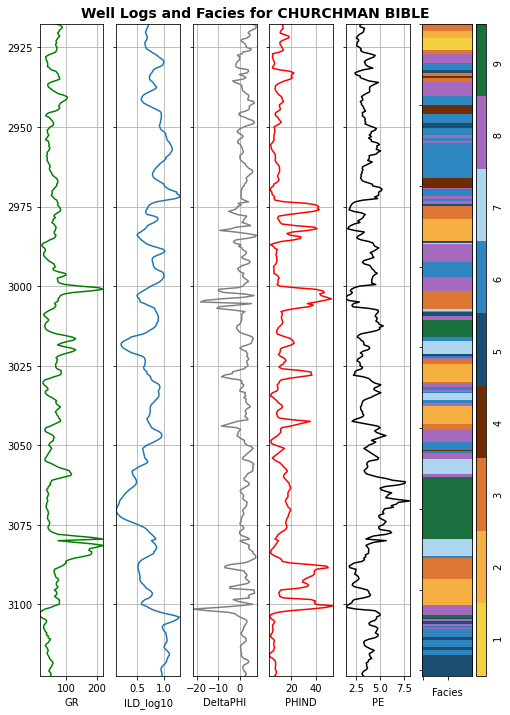

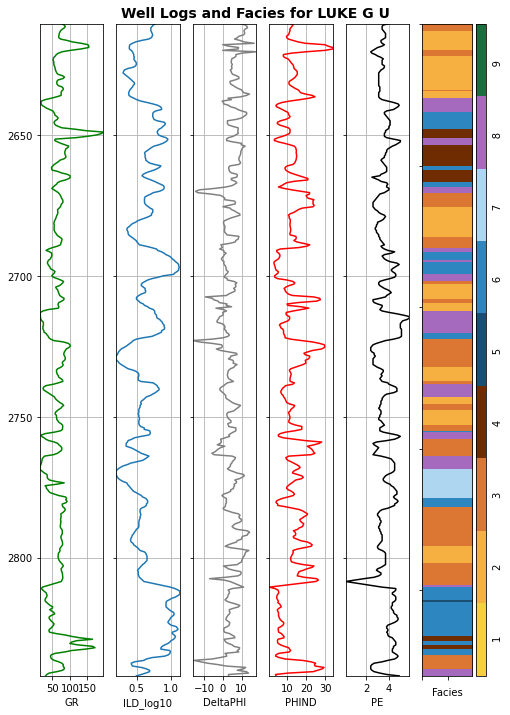

In [3]:
facies_colors = config.FACIES_COLORS
utils.make_facies_log_plot(
    data[data['Well Name'] == 'CHURCHMAN BIBLE'],
    facies_colors)

utils.make_facies_log_plot(
    data[data['Well Name'] == 'LUKE G U'],
    facies_colors)

## 4.0 Preprocess

From our EDA notebook, we observed the skewed distribution of the numerical features of our dataset. In this preprocessing step, we want to reduce this skewness.

First, let's put the skewedness of the data in numbers to easily compare on eto another.

In [4]:
numerical_columns = data.drop(['Facies', 'Formation', 'Well Name'], axis =1).columns
numerical_columns

Index(['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'],
      dtype='object')

In [5]:
skewed_dict = {}
for column in numerical_columns:
    skewed_dict[column] = data[column].skew()
skewed_df = pd.DataFrame(skewed_dict.items(), columns=['feature', 'skewness'])
skewed_df

,feature,skewness
0,Depth,-0.406834
1,GR,2.271149
2,ILD_log10,0.033385
3,DeltaPHI,-0.813515
4,PHIND,2.241312
5,PE,0.661600
6,NM_M,0.006191
7,RELPOS,-0.032563


Let us now apply the functionn to reduce the skewedness of the data.

In [6]:
data = utils.unskew(data)

We can generate the skewedness dataframe again and compare results with the original skewedness of the data. It can be observed that the skewedness have been reduced. The histogram of the new data will show the improvement in the distribution of the numerical data.

In [7]:
reskewed_dict = {}
for column in numerical_columns:
    reskewed_dict[column] = data[column].skew()
reskewed_df = pd.DataFrame(reskewed_dict.items(), columns=['feature', 'skewness'])
reskewed_df

,feature,skewness
0,Depth,-0.406834
1,GR,0.061568
2,ILD_log10,0.033385
3,DeltaPHI,-0.813515
4,PHIND,0.006202
5,PE,0.063984
6,NM_M,0.006191
7,RELPOS,-0.032563


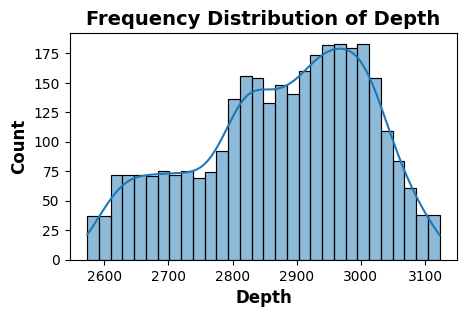

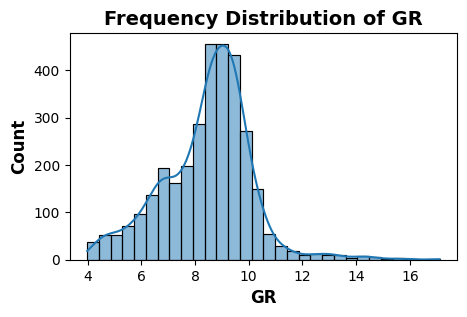

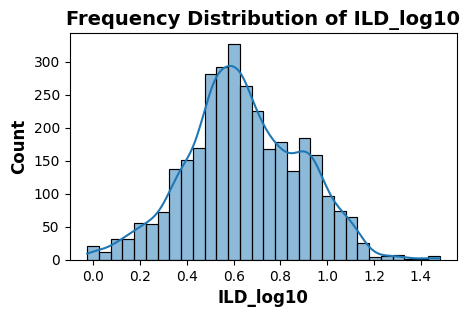

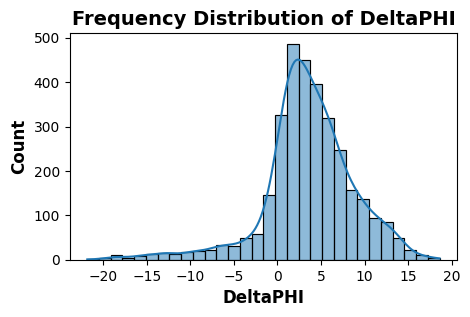

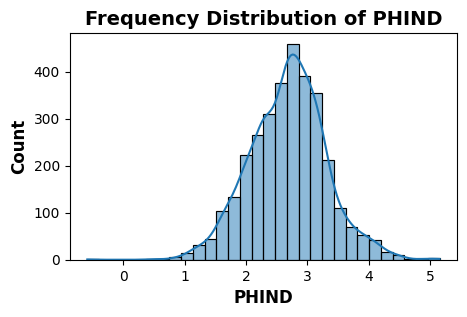

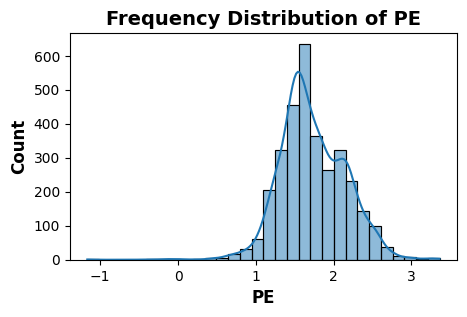

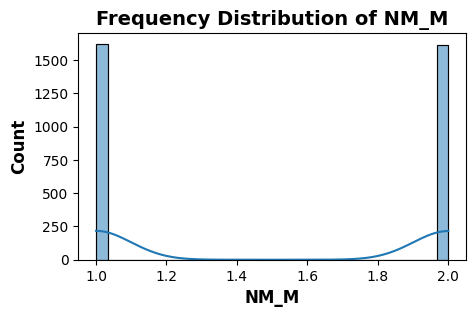

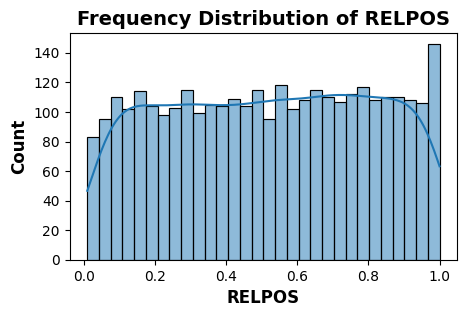

In [8]:
for column in numerical_columns:
    utils.UniAnalysis(data).create_histplot(column, 30)

There are other transformation we can apply to our data to reduce the skewedness. We can look at some of them and their resultant plots can give us some information as to the reduced skewedness in the data. We will use only the 'GR' nd 'PHIND' columns for the visualisation.

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer
data_preprocess = data.drop(['Facies', 'Well Name', 'Formation'], axis = 1)

MinMax_data_preprocess = MinMaxScaler().fit_transform(data_preprocess)
Stan_data_preprocess = StandardScaler().fit_transform(data_preprocess)
Norm_data_preprocess = Normalizer().fit_transform(data_preprocess)
PowerT_data_preprocess = PowerTransformer().fit_transform(data_preprocess)

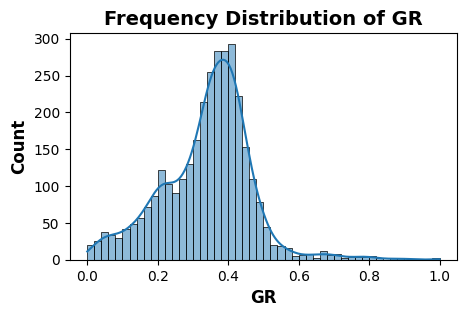

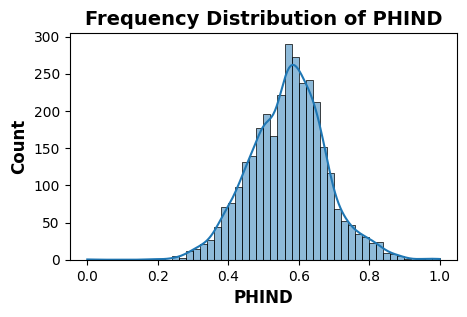

In [22]:
#MinMax preprocessing
utils.UniAnalysis(pd.DataFrame(MinMax_data_preprocess, 
                    columns = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
                    'RELPOS'])).create_histplot('GR', 50)
utils.UniAnalysis(pd.DataFrame(MinMax_data_preprocess, 
                    columns = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
                    'RELPOS'])).create_histplot('PHIND', 50)

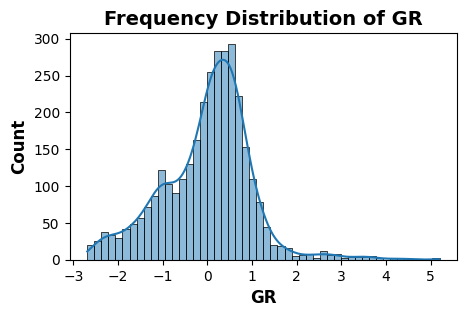

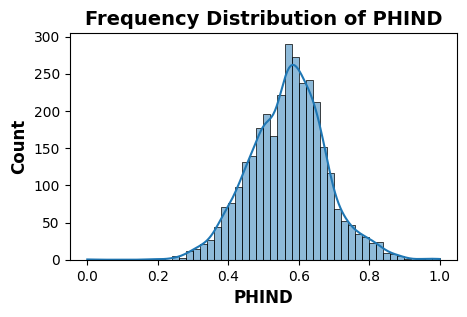

In [23]:
#StandardScaler
utils.UniAnalysis(pd.DataFrame(Stan_data_preprocess, 
                    columns = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'])).create_histplot('GR', 50)

utils.UniAnalysis(pd.DataFrame(MinMax_data_preprocess, 
                    columns = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'])).create_histplot('PHIND', 50)

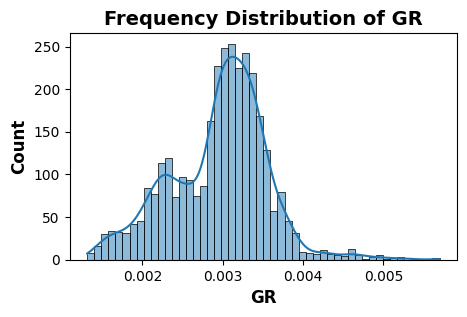

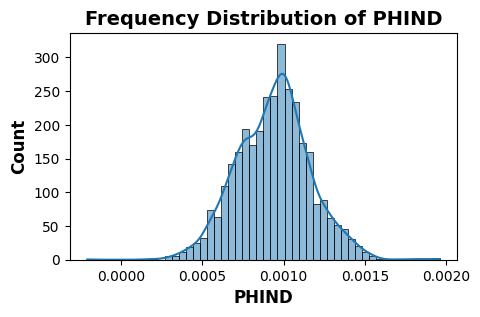

In [24]:
#Normalizer
utils.UniAnalysis(pd.DataFrame(Norm_data_preprocess, 
                    columns = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'])).create_histplot('GR', 50)

utils.UniAnalysis(pd.DataFrame(Norm_data_preprocess, 
                    columns = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'])).create_histplot('PHIND', 50)

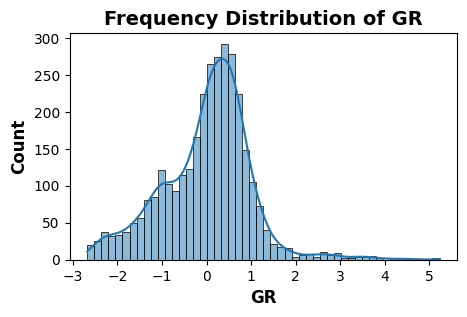

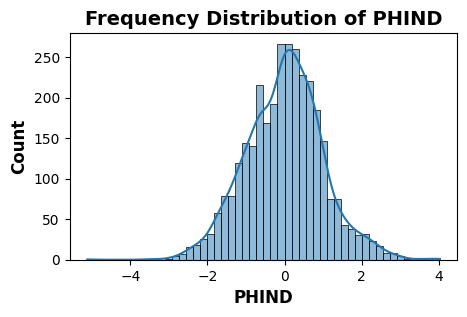

In [25]:
#PowerTransformer
utils.UniAnalysis(pd.DataFrame(PowerT_data_preprocess, 
                    columns = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'])).create_histplot('GR', 50)

utils.UniAnalysis(pd.DataFrame(PowerT_data_preprocess, 
                    columns = ['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M',
       'RELPOS'])).create_histplot('PHIND', 50)

There is some observed reduction in the skewedness of the data.

## Next Step
- Modelling

Let's apply these preprocessing steps in our modelling to see how they help to improve model performance.